In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [33]:
df_pull = pd.read_csv('pulls.csv')
df_pull_files = pd.read_csv('pull_files.csv')
df_pull

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z
...,...,...,...
6195,547941,xeno-by,2011-12-01T16:16:42Z
6196,547354,szeiger,2011-12-01T14:03:23Z
6197,547150,odersky,2011-12-01T12:39:40Z
6198,547003,robinst,2011-12-01T11:42:26Z


In [34]:
df_pull_files

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java
...,...,...
85583,547354,test/files/run/bitsets.check
85584,547354,test/files/run/bitsets.scala
85585,547150,src/compiler/scala/tools/nsc/transform/LiftCod...
85586,547150,src/library/scala/reflect/api/Trees.scala


In [35]:
#question_one




def answer_one():
    return display(df_pull.head()) ,display(df_pull_files.head())

In [36]:
answer_one()

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z


,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


(None, None)

In [37]:
#question_2



def answer_two():
    df_pull['date'] = pd.to_datetime(df_pull['date'], utc=True)
    return df_pull.head()

In [38]:
answer_two()

,pid,user,date
0,163314316,hrhino,2018-01-16 23:29:16+00:00
1,163061502,joroKr21,2018-01-15 23:44:52+00:00
2,163057333,mkeskells,2018-01-15 23:05:06+00:00
3,162985594,lrytz,2018-01-15 15:52:39+00:00
4,162838837,zuvizudar,2018-01-14 19:16:16+00:00


In [39]:
#Question_3


df = pd.merge(left=df_pull, right=df_pull_files, how='outer', on='pid')

def answer_three():
    return df.head()

In [40]:
answer_three()

,pid,user,date,file
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java


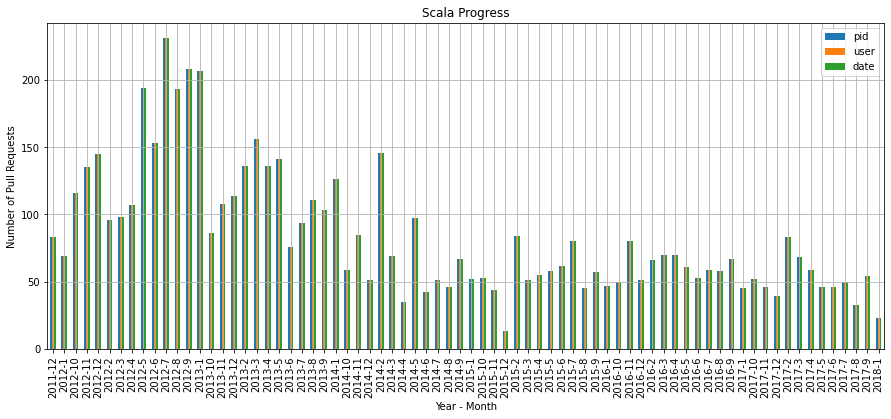

In [41]:
#Question_4



def answer_four():
    df_pull['pull_month_year'] = df_pull.apply(lambda x: str(x['date'].year) + '-' + str(x['date'].month), axis = 1)
    month_counts = df_pull.groupby('pull_month_year').count()
    month_counts.plot(kind='bar', figsize=(15,6), grid=True)
    plt.title("Scala Progress")
    plt.xlabel("Year - Month")
    plt.ylabel("Number of Pull Requests")
answer_four()

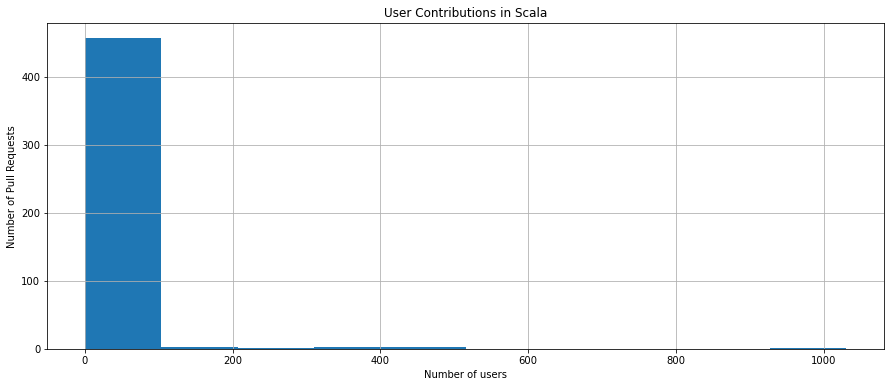

In [44]:
#question_5



def answer_five():
    user_counts = df_pull.groupby('user')['pid'].count()
    user_counts.plot(kind='hist', figsize=(15,6), grid=True)
    plt.title("User Contributions in Scala")
    plt.xlabel("Number of users")
    plt.ylabel("Number of Pull Requests")
answer_five()

In [47]:
#Question_six



def answer_six():
    return df.nlargest(10, 'date')
answer_six()

,pid,user,date,file
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java
5,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumnImpl.java
6,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/Test.scala
7,163061502,joroKr21,2018-01-15 23:44:52+00:00,src/library/scala/concurrent/Lock.scala
8,163057333,mkeskells,2018-01-15 23:05:06+00:00,src/compiler/scala/tools/nsc/profile/AsyncHelp...
9,163057333,mkeskells,2018-01-15 23:05:06+00:00,src/compiler/scala/tools/nsc/profile/Profiler....


In [48]:
#question_7


def answer_seven():
    file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
    df_data = df[df['file'] == file]
    df_develop = df_data.groupby('user').count()
    return df_develop.nlargest(3, 'pid')
answer_seven()

,pid,date,file
user,,,
xeno-by,11,11,11
retronym,5,5,5
soc,4,4,4


In [51]:
#question_eight


def answer_eight():
    file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
    df_data =df[df['file'] == file]
    user =df_data.nlargest(10, 'date')
    return list(user['user'].unique())
answer_eight()

['zuvizudar', 'retronym', 'xeno-by', 'soc', 'bjornregnell', 'starblood']

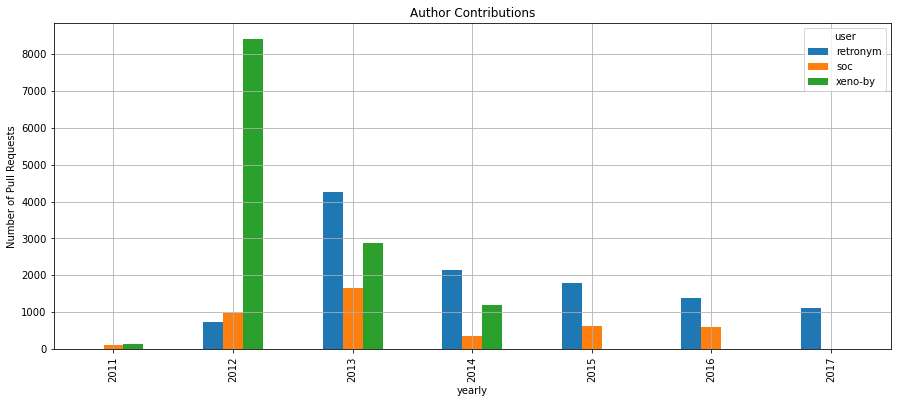

In [55]:
#question_nine


def answer_nine():
    
    df_authors = answer_eight()[1:4]
    df_author = df[df['user'].isin(df_authors)]
    author_count = df_author.groupby(['user', df_author['date'].dt.year])['pid'].count().reset_index()
#author_counts
    yearwise_count = author_count.pivot_table(index='date', columns='user', values='pid', fill_value=0)
#counts_wide
    yearwise_count.plot(kind='bar', figsize=(15,6), grid=True)
    plt.title("Author Contributions")
    plt.xlabel("yearly")
    plt.ylabel("Number of Pull Requests")
answer_nine()

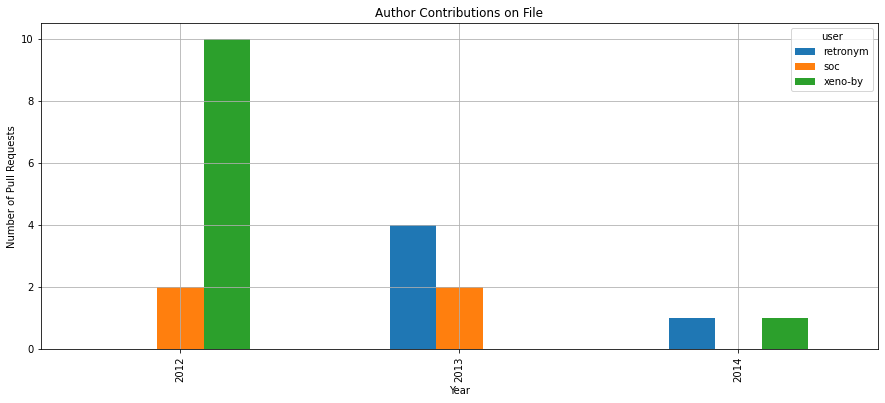

In [60]:
#Question_ten



def answer_ten():
    
    df_authors = answer_eight()[1:4]
    file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
    df_author = df[df['user'].isin(df_authors)]
    df_file_affected = df_author[df_author['file'] == file]
    user_pulls_group = df_file_affected.groupby(['user', df_file_affected['date'].dt.year])['pid'].count().reset_index()
    yearwise_count = user_pulls_group.pivot_table(index='date', columns='user', values='pid', fill_value=0)
    
    yearwise_count.plot(kind='bar', figsize=(15,6), grid=True)
    plt.title("Author Contributions on File")
    plt.xlabel("Year")
    plt.ylabel("Number of Pull Requests")
answer_ten()

Text(0, 0.5, 'Frequency')

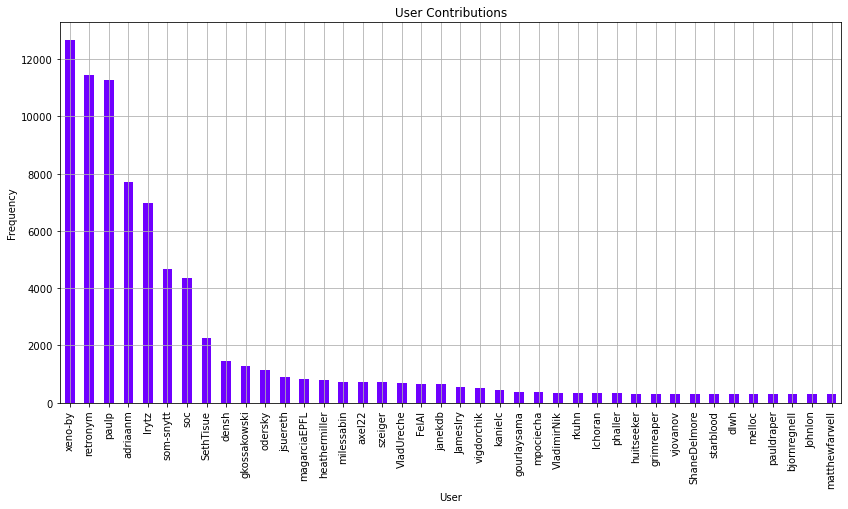

In [61]:
#Question_11



df['user'].value_counts().nlargest(40).plot(kind='bar', figsize=(14,7), grid=True, color="#6f00ff")
plt.title("User Contributions")
plt.xlabel("User")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

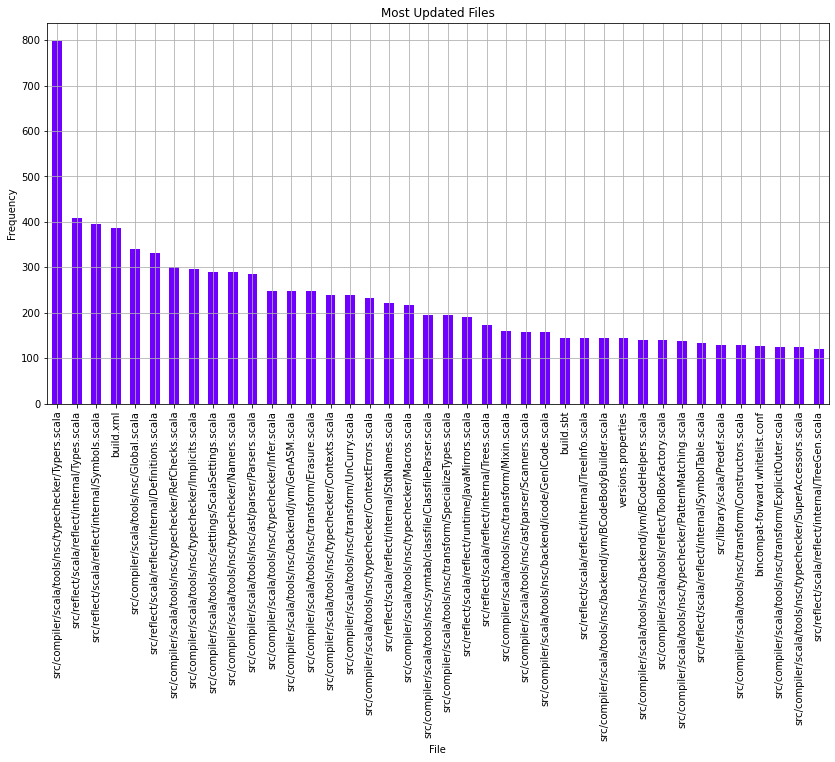

In [62]:
#question_11


df['file'].value_counts().nlargest(40).plot(kind='bar', figsize=(14,7), grid=True, color="#6f00ff")
plt.title("Most Updated Files")
plt.xlabel("File")
plt.ylabel("Frequency")